<a href="https://colab.research.google.com/github/gauravsharans/202_Finals/blob/main/lung_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lung Segmentation using UNet- Torch Xray API

In [1]:
 pip install torchxrayvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 16.3 MB/s eta 0:00:00


In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import skimage
import torch
import torchvision
import matplotlib.pyplot as plt
import torchxrayvision as xrv
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
import glob
import cv2

In [3]:
model = xrv.baseline_models.chestx_det.PSPNet()
model

If this fails you can run `wget https://github.com/mlmed/torchxrayvision/releases/download/v1/pspnet_chestxray_best_model_4.pth -O /root/.torchxrayvision/models_data/pspnet_chestxray_best_model_4.pth`
[██████████████████████████████████████████████████]


chestx-det-pspnet

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Get the path to the images
dir = Path('/content/drive/MyDrive/Colab Notebooks/Info202_Final_Project/Data/Lung_Segmentation/images')

# Get the list of all the images
file_list = dir.glob('*.jpg')

images = [file for file in file_list]

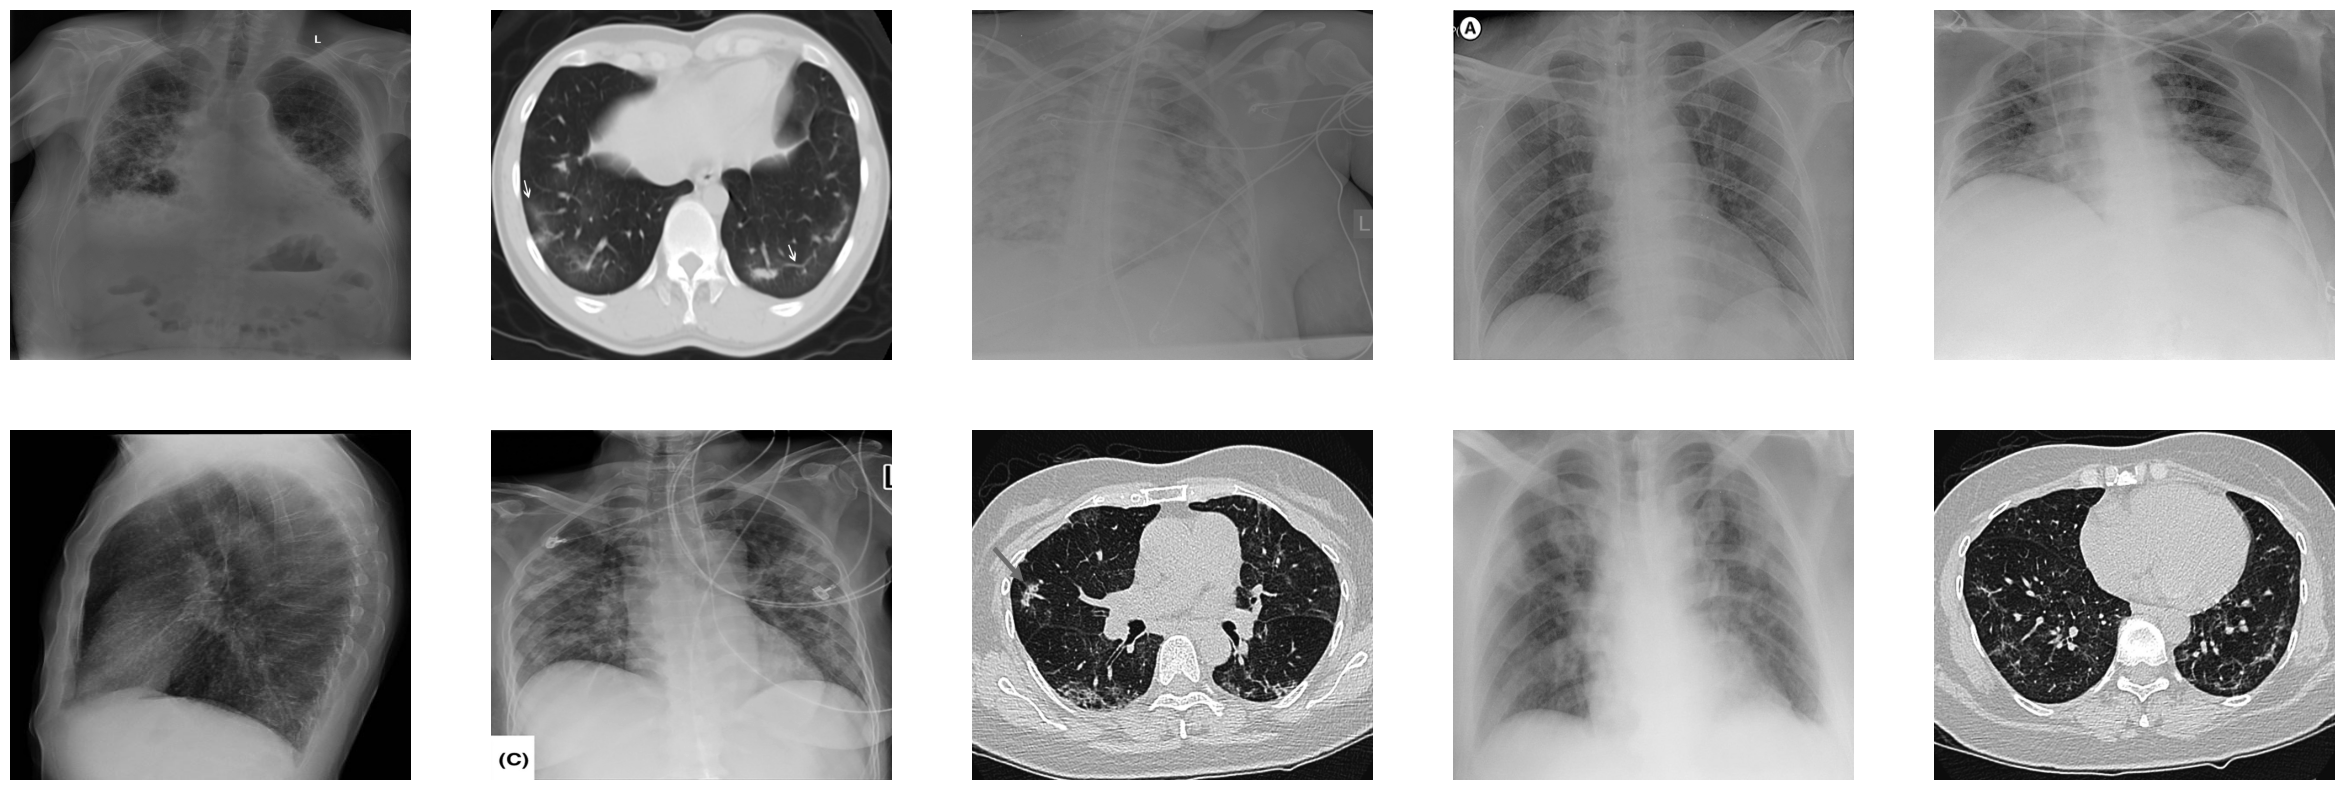

In [6]:
# Plot some x-ray images
samples = images[:10]

f, ax = plt.subplots(2, 5, figsize = (30,10))
for i in range(10):
  img = imread(samples[i])
  ax[i//5, i%5].imshow(img, cmap = 'gray')
  ax[i//5, i%5].axis('off')
  ax[i//5, i%5].set_aspect('auto')
plt.show()

In [ ]:
x_rays = []
img_pred = []

for image in images:
  img = skimage.io.imread(image)
  if len(img.shape) == 3:

    img = xrv.datasets.normalize(img, 255) # convert 8-bit image to [-1024, 1024] range
    img = img.mean(2)[None, ...] # Make single color channel

    transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(512)])

    img = transform(img)
    img = torch.from_numpy(img)
    x_rays.append(img)
    with torch.no_grad():
      pred = model(img)
      img_pred.append(img_pred)

Setting XRayResizer engine to cv2 could increase performance.
Setting XRayResizer engine to cv2 could increase performance.
Setting XRayResizer engine to cv2 could increase performance.
Setting XRayResizer engine to cv2 could increase performance.
Setting XRayResizer engine to cv2 could increase performance.
Setting XRayResizer engine to cv2 could increase performance.
Setting XRayResizer engine to cv2 could increase performance.
Setting XRayResizer engine to cv2 could increase performance.
Setting XRayResizer engine to cv2 could increase performance.
Setting XRayResizer engine to cv2 could increase performance.
Setting XRayResizer engine to cv2 could increase performance.
Setting XRayResizer engine to cv2 could increase performance.
Setting XRayResizer engine to cv2 could increase performance.
Setting XRayResizer engine to cv2 could increase performance.
Setting XRayResizer engine to cv2 could increase performance.
Setting XRayResizer engine to cv2 could increase performance.
Setting 

In [ ]:
x_rays

In [ ]:
# Sample
plt.figure(figsize = (26,5))
plt.subplot(1, len(model.targets) + 1, 1)
plt.imshow(x_rays[0], cmap = 'gray')
for i in range(len(model.targets)):
    plt.subplot(1, len(model.targets) + 1, i+2)
    plt.imshow(pred[0, i])
    plt.title(model.targets[i])
    plt.axis('off')
plt.tight_layout()

In [ ]:
for pred in img_pred
  pred = 1 / (1 + np.exp(-pred))  # sigmoid
  pred[pred < 0.5] = 0
  pred[pred > 0.5] = 1

In [ ]:
#Sample
plt.figure(figsize = (26,5))
plt.subplot(1, len(model.targets) + 1, 1)
plt.imshow(x_rays[0], cmap='gray')
for i in range(len(model.targets)):
    plt.subplot(1, len(model.targets) + 1, i+2)
    plt.imshow(pred[0, i])
    plt.title(model.targets[i])
    plt.axis('off')
plt.tight_layout()